In [2]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
import matplotlib as mpl
import matplotlib.font_manager as fm

# 폰트 파일 경로 지정
font_path = '/content/drive/MyDrive/font/NanumGothic.ttf'

# 폰트 등록 및 matplotlib 설정
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)
# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

#저장라이브러리
import pickle

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터를 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

import os

In [3]:
df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/total.parquet')
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,None,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01,0,None,None,None,None
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01,0,appliances,environment,water_heater,None
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,2019-10-01,0,furniture,living_room,sofa,None
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01,0,computers,notebook,None,None
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01,0,electronics,smartphone,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345120463,2020-03-31 23:59:55+00:00,view,1005212,2232732093077520756,construction.tools.light,samsung,178.12,516506125,cdd4bce1-ff8c-49c3-92b3-0c7a209c8b24,2020-03-31,23,construction,tools,light,None
345120464,2020-03-31 23:59:55+00:00,view,1701027,2232732099981345295,appliances.personal.massager,samsung,154.42,572260610,2e16ffb5-996f-40d3-b98e-ddc53b546357,2020-03-31,23,appliances,personal,massager,None
345120465,2020-03-31 23:59:56+00:00,view,2601488,2232732101835227701,None,darina,167.29,523607693,6836d271-ef67-42dc-8756-4ef103e4fbf1,2020-03-31,23,None,None,None,None
345120466,2020-03-31 23:59:56+00:00,view,100006963,2232732099754852875,appliances.personal.massager,yasin,163.16,629229484,c00a1636-dfc2-4e96-a6a3-7fd979e93789,2020-03-31,23,appliances,personal,massager,None


# ✅ 카테고리별 평균 구매율 비교(파이, 막대)

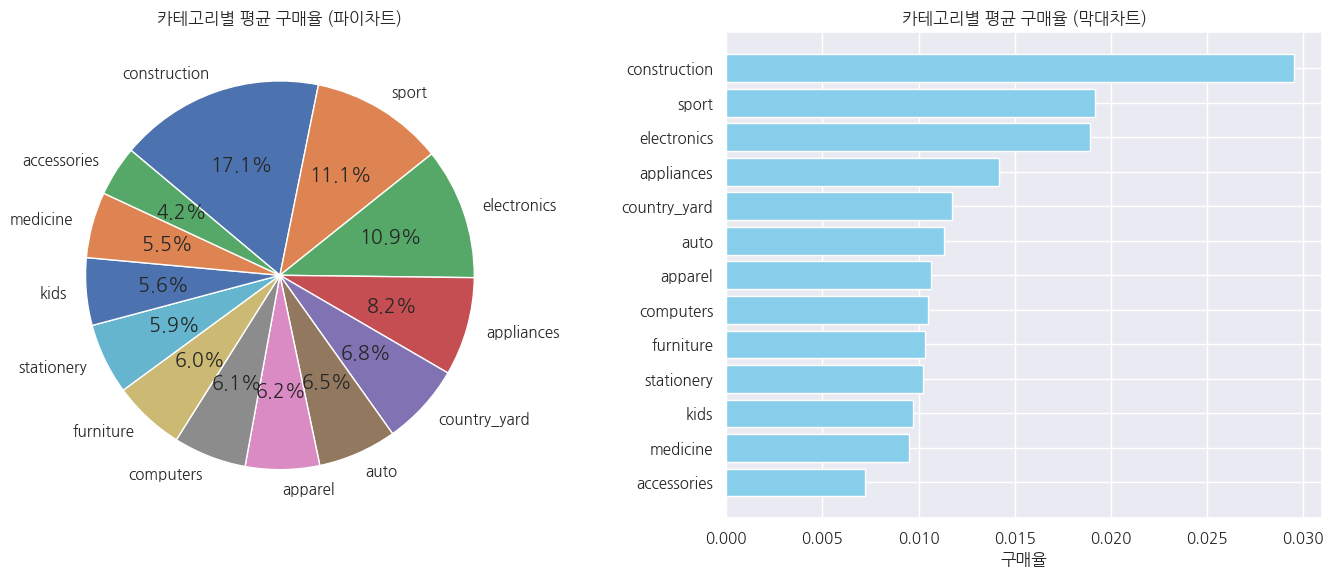

In [15]:
# 1. 카테고리별 평균 구매율 계산
# 구매율 = 구매 수 / 전체 수 (유저 단위 or 이벤트 단위로 계산 방식 조정 가능)
category_stats = df.groupby('category_lvl1')['event_type'].apply(lambda x: (x == 'purchase').mean()).reset_index(name='purchase_rate')
category_stats = category_stats.sort_values('purchase_rate', ascending=False)

# 2. 시각화 (좌: 파이, 우: 막대)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ▶ 파이차트
axes[0].pie(
    category_stats['purchase_rate'],
    labels=category_stats['category_lvl1'],
    autopct='%1.1f%%',
    startangle=140,
    counterclock=False
)
axes[0].set_title('카테고리별 평균 구매율 (파이차트)')

# ▶ 막대차트
axes[1].barh(
    category_stats['category_lvl1'],
    category_stats['purchase_rate'],
    color='skyblue'
)
axes[1].invert_yaxis()  # 높은 구매율이 위로
axes[1].set_title('카테고리별 평균 구매율 (막대차트)')
axes[1].set_xlabel('구매율')

plt.tight_layout()
plt.show()

In [17]:
# 세션별로 어떤 이벤트가 발생했는지 집계
session_event_counts = df.groupby('user_session')['event_type'].unique().reset_index()

# view는 포함하고, purchase도 포함된 세션
session_event_counts['has_view'] = session_event_counts['event_type'].apply(lambda x: 'view' in x)
session_event_counts['has_purchase'] = session_event_counts['event_type'].apply(lambda x: 'purchase' in x)

# view가 있는 세션 중 purchase도 있는 비율 계산
view_sessions = session_event_counts[session_event_counts['has_view']]
converted_sessions = view_sessions[view_sessions['has_purchase']]

conversion_rate = len(converted_sessions) / len(view_sessions) * 100

print(f"📊 View → Purchase 전환율: {conversion_rate:.2f}%")

KeyboardInterrupt: 

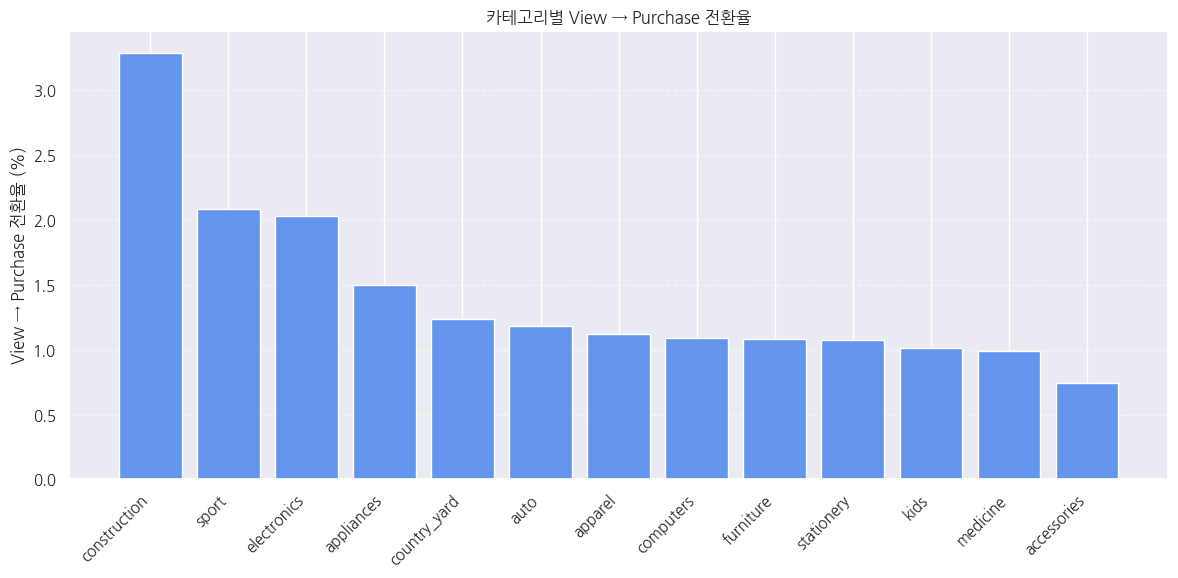

In [18]:
# (1) view 수 집계
view_counts = df[df['event_type'] == 'view'].groupby('category_lvl1').size().reset_index(name='view_count')

# (2) purchase 수 집계
purchase_counts = df[df['event_type'] == 'purchase'].groupby('category_lvl1').size().reset_index(name='purchase_count')

# (3) 병합 후 전환율 계산
conversion_df = pd.merge(view_counts, purchase_counts, on='category_lvl1', how='inner')
conversion_df['conversion_rate'] = (conversion_df['purchase_count'] / conversion_df['view_count']) * 100

# (4) 정렬
conversion_df = conversion_df.sort_values('conversion_rate', ascending=False)

# (5) 시각화 (막대 차트)
plt.figure(figsize=(12, 6))
plt.bar(conversion_df['category_lvl1'], conversion_df['conversion_rate'], color='cornflowerblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('View → Purchase 전환율 (%)')
plt.title('카테고리별 View → Purchase 전환율')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


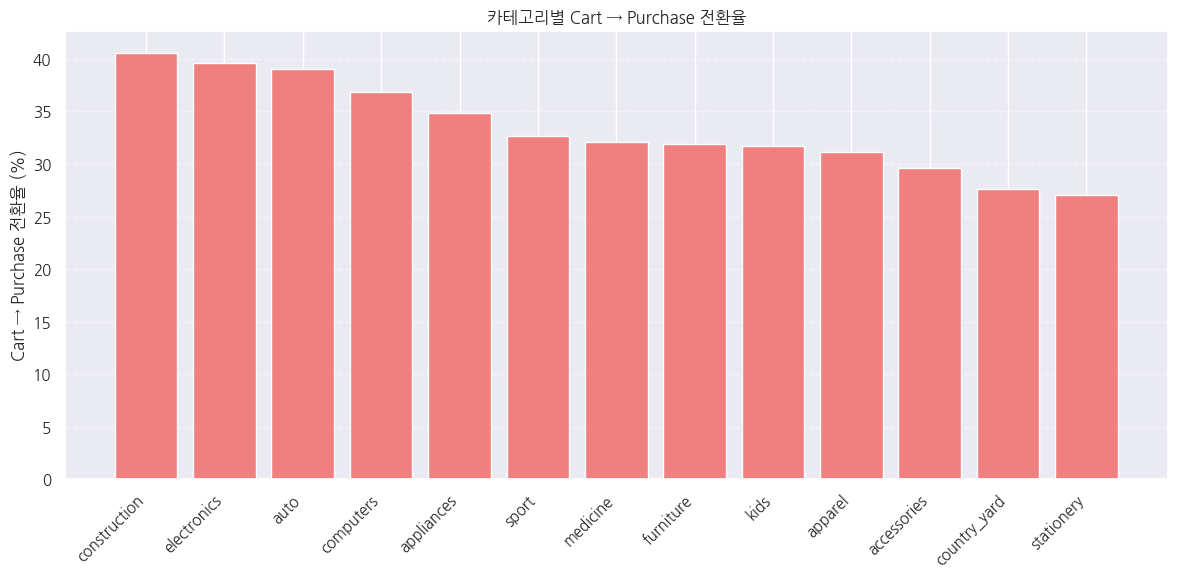

In [19]:
# (1) cart 수 집계
cart_counts = df[df['event_type'] == 'cart'].groupby('category_lvl1').size().reset_index(name='cart_count')

# (2) purchase 수 집계
purchase_counts = df[df['event_type'] == 'purchase'].groupby('category_lvl1').size().reset_index(name='purchase_count')

# (3) 병합
conversion_df = pd.merge(cart_counts, purchase_counts, on='category_lvl1', how='inner')

# (4) 전환율 계산
conversion_df['conversion_rate'] = (conversion_df['purchase_count'] / conversion_df['cart_count']) * 100

# (5) 정렬
conversion_df = conversion_df.sort_values('conversion_rate', ascending=False)

# (6) 시각화
plt.figure(figsize=(12, 6))
plt.bar(conversion_df['category_lvl1'], conversion_df['conversion_rate'], color='lightcoral')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cart → Purchase 전환율 (%)')
plt.title('카테고리별 Cart → Purchase 전환율')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ✅ 월별 카테고리별 구매 현황

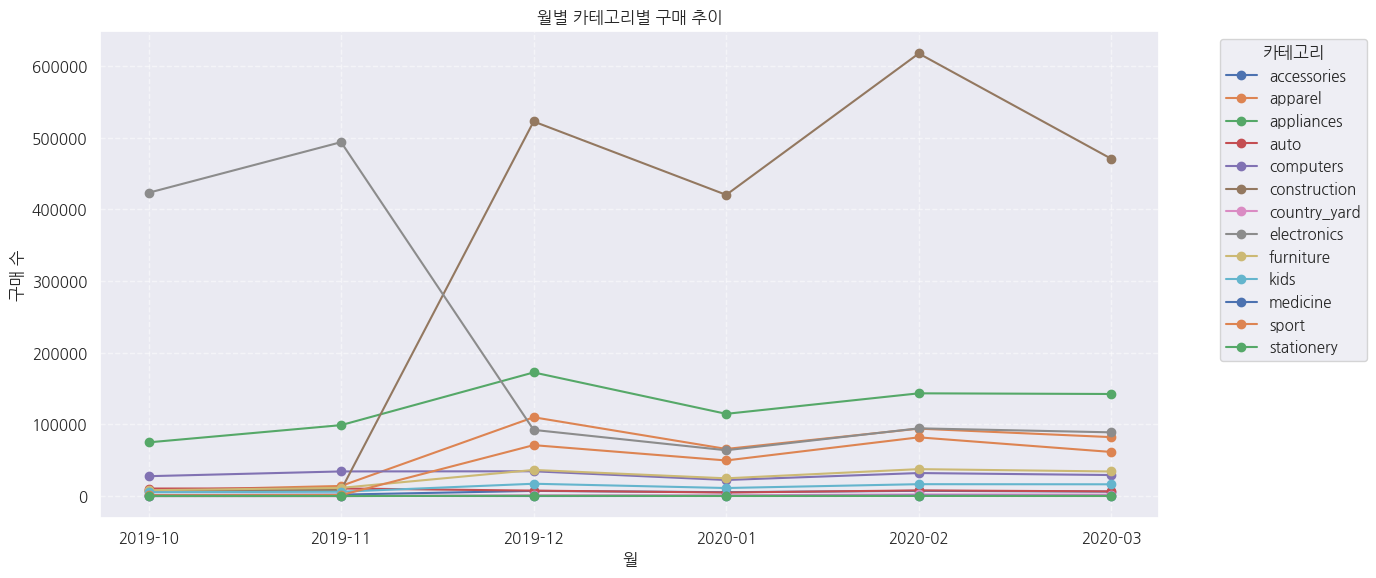

In [20]:
# 1. purchase 이벤트만 필터링
df_purchase = df[df['event_type'] == 'purchase'].copy()

# 2. 월 정보 추출
df_purchase['purchase_month'] = df_purchase['event_time'].dt.to_period('M').astype(str)

# 3. 월별 × 카테고리별 구매 수 집계
monthly_category_sales = df_purchase.groupby(['purchase_month', 'category_lvl1']).size().reset_index(name='purchase_count')

# 4. 피벗 테이블로 변환
pivot_table = monthly_category_sales.pivot(index='purchase_month', columns='category_lvl1', values='purchase_count').fillna(0)

# 5. 시각화
pivot_table.plot(kind='line', figsize=(14, 6), marker='o')
plt.title('월별 카테고리별 구매 추이')
plt.xlabel('월')
plt.ylabel('구매 수')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# ✅ 한번만 구매한 고객의 행동 패턴

In [21]:
# 1. 1회만 구매한 유저 식별
purchase_users = df[df['event_type'] == 'purchase']['user_id']
purchase_counts = purchase_users.value_counts()
one_time_buyers = purchase_counts[purchase_counts == 1].index

# 2. 해당 유저의 전체 이벤트 필터링
df_one_time = df[df['user_id'].isin(one_time_buyers)].copy()

# 3. 카테고리, 세션 단위 정렬
df_one_time = df_one_time.sort_values(by=['user_id', 'user_session', 'category_lvl1', 'event_time'])

# 4. 이벤트별 시간 저장
def get_transition_times(group):
    view_time = group[group['event_type'] == 'view']['event_time'].min()
    cart_time = group[group['event_type'] == 'cart']['event_time'].min()
    purchase_time = group[group['event_type'] == 'purchase']['event_time'].min()

    return pd.Series({
        'view_to_cart_sec': (cart_time - view_time).total_seconds() if pd.notnull(view_time) and pd.notnull(cart_time) else None,
        'cart_to_purchase_sec': (purchase_time - cart_time).total_seconds() if pd.notnull(purchase_time) and pd.notnull(cart_time) else None
    })

# 5. 카테고리별, 세션별 시간 계산
transition_times = df_one_time.groupby(['user_id', 'user_session', 'category_lvl1']).apply(get_transition_times).reset_index()

# 6. 카테고리별 평균 시간 계산
category_avg_time = transition_times.groupby('category_lvl1')[['view_to_cart_sec', 'cart_to_purchase_sec']].mean().dropna()

# 7. 보기 좋게 출력
print(category_avg_time.sort_values('view_to_cart_sec'))

KeyboardInterrupt: 

In [ ]:
category_avg_time.plot(kind='bar', figsize=(12, 6))
plt.title('1회 구매 고객의 단계별 소요 시간 (초)')
plt.ylabel('소요 시간 (초)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
